In [6]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from collections import defaultdict


data preprocessing

In [7]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    return text

# Function to load dataset
def load_dataset(train_file, test_file):
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    # Preprocess text
    train_df['Sentence'] = train_df['Sentence'].apply(preprocess_text)
    test_df['Sentence'] = test_df['Sentence'].apply(preprocess_text)

    return train_df, test_df

# Load all datasets
hate_train, hate_test = load_dataset("hate_train.csv", "hate_test.csv")
humor_train, humor_test = load_dataset("humor_train.csv", "humor_test.csv")
sarcasm_train, sarcasm_test = load_dataset("sarcasm_train.csv", "sarcasm_test.csv")


feature extraction from all datasets, i have renamed validation set as training set

In [8]:
# Function to extract features using n-grams
def extract_features(train_texts, test_texts, ngram_range=(1, 3)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    return X_train, X_test, vectorizer

# Extract features
X_train_hate, X_test_hate, vectorizer_hate = extract_features(hate_train['Sentence'], hate_test['Sentence'])
X_train_humor, X_test_humor, vectorizer_humor = extract_features(humor_train['Sentence'], humor_test['Sentence'])
X_train_sarcasm, X_test_sarcasm, vectorizer_sarcasm = extract_features(sarcasm_train['Sentence'], sarcasm_test['Sentence'])


training the model

In [10]:
# Function to train a model
def train_model(X_train, y_train, model_type="nb"):
    if model_type == "nb":
        model = MultinomialNB()
    elif model_type == "svm":
        model = SVC(kernel="linear", probability=True)

    model.fit(X_train, y_train)
    return model

# Train models
model_hate_nb = train_model(X_train_hate, hate_train['Tag'], model_type="nb")
model_humor_nb = train_model(X_train_humor, humor_train['Tag'], model_type="nb")
model_sarcasm_nb = train_model(X_train_sarcasm, sarcasm_train['Tag'], model_type="nb")

model_hate_svm = train_model(X_train_hate, hate_train['Tag'], model_type="svm")
model_humor_svm = train_model(X_train_humor, humor_train['Tag'], model_type="svm")
model_sarcasm_svm = train_model(X_train_sarcasm, sarcasm_train['Tag'], model_type="svm")


calculating F1 score

In [18]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return f1_score(y_test, y_pred, pos_label=1)

# Evaluate Naive Bayes models
print("Hate Speech (Naive Bayes):")
f1_hate_nb = evaluate_model(model_hate_nb, X_test_hate, hate_test['Tag'])

print("Humor (Naive Bayes):")
f1_humor_nb = evaluate_model(model_humor_nb, X_test_humor, humor_test['Tag'])

print("Sarcasm (Naive Bayes):")
f1_sarcasm_nb = evaluate_model(model_sarcasm_nb, X_test_sarcasm, sarcasm_test['Tag'])

# Evaluate SVM models
print("Hate Speech (SVM):")
f1_hate_svm = evaluate_model(model_hate_svm, X_test_hate, hate_test['Tag'])

print("Humor (SVM):")
f1_humor_svm = evaluate_model(model_humor_svm, X_test_humor, humor_test['Tag'])

print("Sarcasm (SVM):")
f1_sarcasm_svm = evaluate_model(model_sarcasm_svm, X_test_sarcasm, sarcasm_test['Tag'])


Hate Speech (Naive Bayes):
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       309
           1       0.59      0.20      0.30       148

    accuracy                           0.70       457
   macro avg       0.65      0.57      0.55       457
weighted avg       0.67      0.70      0.64       457

Humor (Naive Bayes):
              precision    recall  f1-score   support

           0       0.78      0.21      0.33       119
           1       0.64      0.96      0.77       176

    accuracy                           0.66       295
   macro avg       0.71      0.59      0.55       295
weighted avg       0.70      0.66      0.59       295

Sarcasm (Naive Bayes):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       474
           1       1.00      0.02      0.04        51

    accuracy                           0.90       525
   macro avg       0.95      0.51      0.49       525
wei

Plotting the F1 scores of positive classes of both naive bayes classifier and SVM

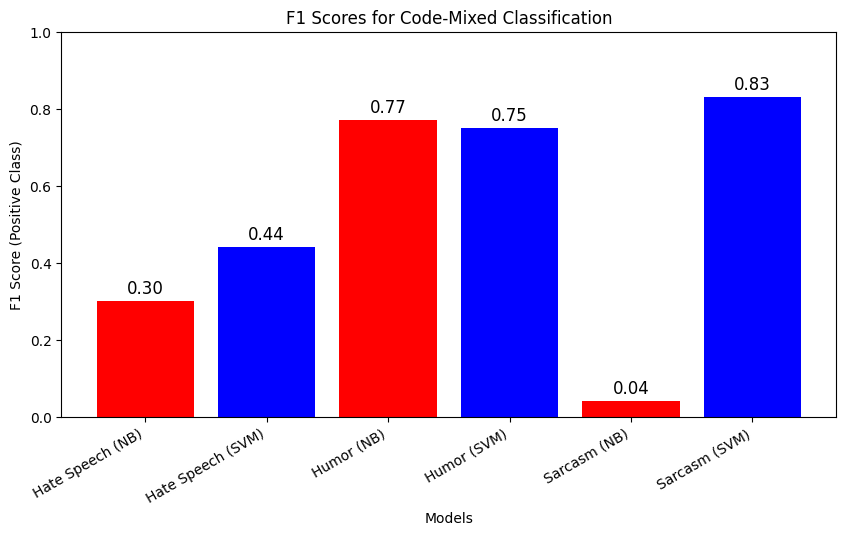

In [20]:
+import matplotlib.pyplot as plt

# F1-scores from your results
f1_scores = {
    "Hate Speech (NB)": 0.30,
    "Hate Speech (SVM)": 0.44,
    "Humor (NB)": 0.77,
    "Humor (SVM)": 0.75,
    "Sarcasm (NB)": 0.04,
    "Sarcasm (SVM)": 0.83
}

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['red', 'blue', 'red', 'blue', 'red', 'blue'])
plt.xlabel("Models")
plt.ylabel("F1 Score (Positive Class)")
plt.title("F1 Scores for Code-Mixed Classification")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1)  # F1-scores range from 0 to 1

# Show the values on top of bars
for i, v in enumerate(f1_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()
